# <center> Pulsar Classification

# Importing data & Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Pulsar.csv')

# EDA

In [ ]:
data.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
data.groupby(['Class']).mean()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
Class,,,,,,,,
0,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344
1,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728


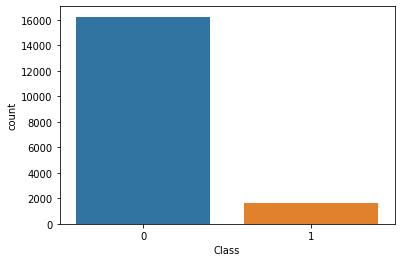

In [ ]:
sns.countplot(data['Class'])

In [ ]:
pd.DataFrame(data.corr()['Class']).sort_values(by='Class').transpose().drop('Class',axis=1).transpose()

,Class
Mean_Integrated,-0.673181
EK_DMSNR_Curve,-0.390816
SD,-0.363708
Skewness_DMSNR_Curve,-0.259117
Mean_DMSNR_Curve,0.400876
SD_DMSNR_Curve,0.491535
Skewness,0.709528
EK,0.791591


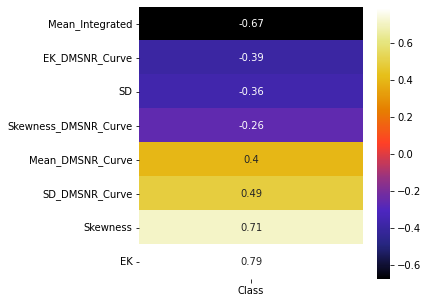

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(data.corr()['Class']).sort_values(by='Class').transpose().drop('Class',axis=1).transpose(),annot=True,cmap='CMRmap')

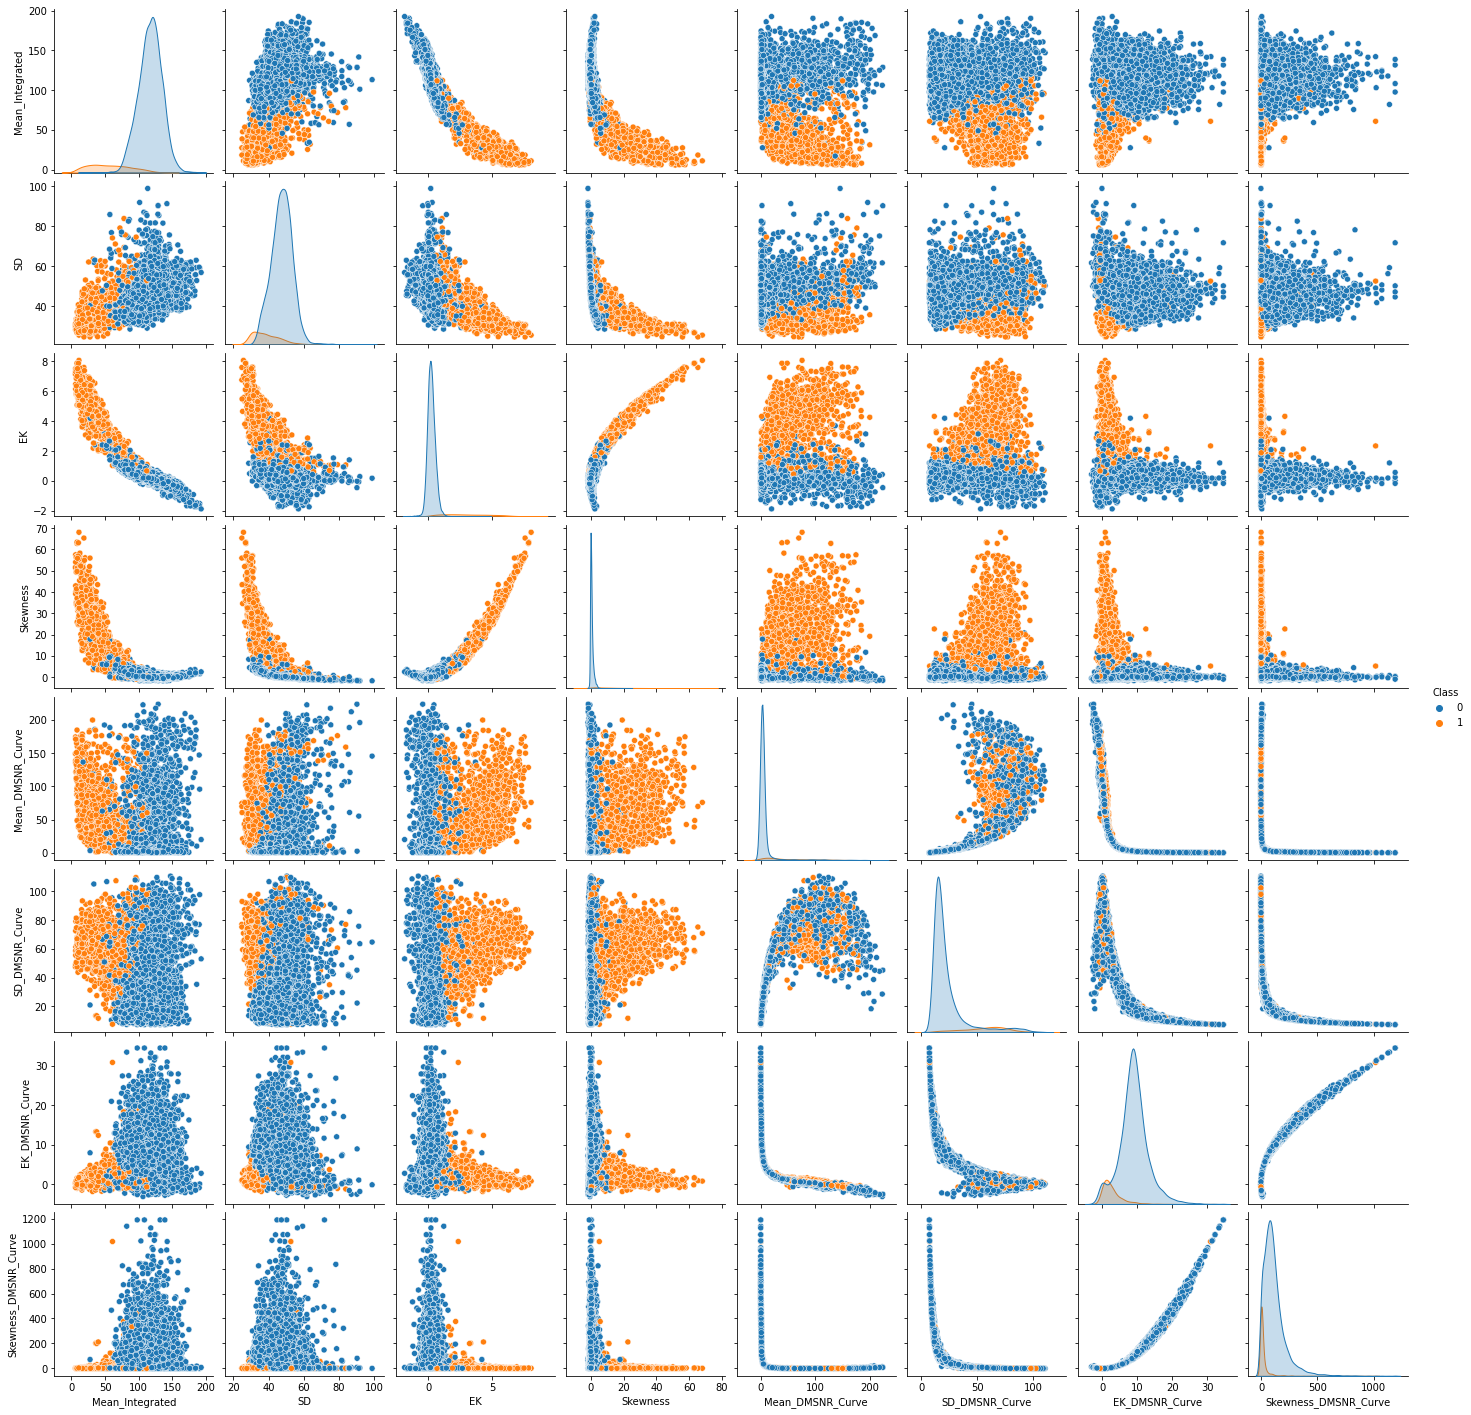

In [ ]:
sns.pairplot(data,hue='Class')

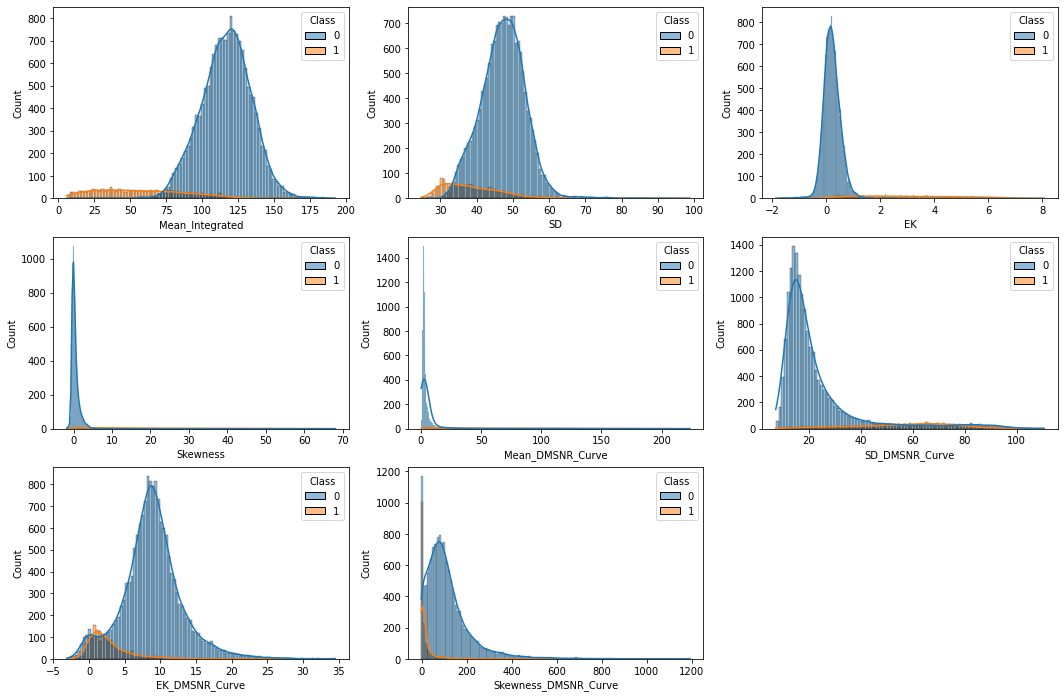

In [ ]:
plt.figure(figsize=(18,12))
m=1
for i in data.drop('Class',axis=1).columns:
    plt.subplot(3,3,m)
    m+=1
    sns.histplot(data=data,x=i,hue='Class',kde=True)

# Feature Selection

In [ ]:
X = data.drop('Class',axis=1)
Y = data['Class']
X['nf']=X['EK']*X['Skewness']

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

# Model selection and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train)
    predK = kn.predict(X_test)
    accuracy.append([accuracy_score(Y_test,predK),i])
    #print('Tested for k =',i)
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
knn = KNeighborsClassifier(n_neighbors=temp[1])

#SVM
from sklearn.svm import SVC
svc = SVC()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

print('Models Imported')

Models Imported


In [ ]:
model_acc = []
models = [xgb,lr,rfc,knn,svc,grid]
#model_name = ['xgb','lr','rfc','kno','svc','grid']
for i in models:
    i.fit(X_train,Y_train)
    model_acc.append(accuracy_score(Y_test,i.predict(X_test)))
                      
models = pd.DataFrame({'Models':models,'Accuracy':model_acc})

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.972 total time=   1.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   1.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.974 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
models = models.sort_values(by=['Accuracy'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

,Models,Accuracy
0,RandomForestClassifier,0.982961
1,XGBClassifier,0.982682
2,KNeighborsClassifier,0.981844
3,LogisticRegression,0.981285
4,GridSearchCV,0.981285
5,SVC,0.979330


In [ ]:
print('Hence the best model is',models['Models'][0],'with an accuracy of',round((models['Accuracy'][0]*100),2),'%')
print('\nThe classification report is:')
print(classification_report(Y_test,best.predict(X_test)))

Hence the best model is RandomForestClassifier with an accuracy of 98.3 %

The classification report is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3260
           1       0.93      0.88      0.90       320

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.95      3580
weighted avg       0.98      0.98      0.98      3580

